<a href="https://colab.research.google.com/github/ganE510/Multi-label-Classsification/blob/patch1/Assignment1_MultiLabelClassification_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP47590: Advanced Machine Learning
# Assignment 1: Multi-label Classification

Name(s): 

Student Number(s):

## Import Packages Etc

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn import tree
from sklearn import metrics
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import linear_model
from sklearn import neighbors
from sklearn import neural_network
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import hamming_loss, f1_score
from sklearn.model_selection import train_test_split
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from imblearn.under_sampling import RandomUnderSampler

# import other useful packages

## Task 0: Load the Yeast Dataset

In [88]:
# Write your code here
dataset = pd.read_csv('yeast.csv')
display(dataset.head())

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,Att11,Att12,Att13,Att14,Att15,Att16,Att17,Att18,Att19,Att20,Att21,Att22,Att23,Att24,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,Att34,Att35,Att36,Att37,Att38,Att39,Att40,...,Att78,Att79,Att80,Att81,Att82,Att83,Att84,Att85,Att86,Att87,Att88,Att89,Att90,Att91,Att92,Att93,Att94,Att95,Att96,Att97,Att98,Att99,Att100,Att101,Att102,Att103,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0.004168,-0.170975,-0.156748,-0.142151,0.058781,0.026851,0.197719,0.041850,0.066938,-0.056617,-0.027230,-0.137411,0.067776,0.047175,0.155671,0.050766,0.102557,-0.020259,-0.200512,-0.095371,-0.081940,-0.103735,0.093299,0.105475,0.148560,0.085925,0.107879,0.108075,0.085388,0.124026,-0.003650,-0.127376,0.039394,-0.018364,0.050378,0.157190,0.203563,0.111552,0.017907,-0.001126,...,-0.175325,-0.133636,0.005524,-0.014981,-0.031946,-0.015114,-0.047175,0.003829,0.010967,-0.006062,-0.027560,-0.019866,-0.024046,-0.025153,-0.009261,-0.025539,0.006166,-0.012976,-0.014259,-0.015024,-0.010747,0.000411,-0.032056,-0.018312,0.030126,0.124722,0,0,0,0,0,0,1,1,0,0,0,1,1,0
1,-0.103956,0.011879,-0.098986,-0.054501,-0.007970,0.049113,-0.030580,-0.077933,-0.080529,-0.016267,-0.215304,-0.009885,-0.155843,-0.059522,-0.098836,-0.071141,-0.023494,-0.071200,0.027767,0.003091,-0.003761,0.074600,0.053080,-0.008138,0.001794,-0.111704,-0.140291,-0.063347,0.066767,-0.167073,-0.095567,-0.047209,0.082206,0.144445,0.086581,-0.111850,-0.086560,0.024942,-0.131539,0.080062,...,-0.001249,-0.020209,-0.077359,-0.045139,-0.074738,0.051846,0.009323,0.184332,0.420424,-0.090224,-0.090718,-0.035266,-0.046729,0.000575,-0.066023,-0.051916,0.007680,0.027719,-0.085811,0.111123,0.050541,0.027565,-0.063569,-0.041471,-0.079758,0.017161,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,0.509949,0.401709,0.293799,0.087714,0.011686,-0.006411,-0.006255,0.013646,-0.040666,-0.024447,-0.040576,0.014326,-0.074968,0.141365,-0.015182,0.013691,0.006893,0.003736,-0.020726,-0.044104,-0.052959,-0.085572,-0.061547,-0.029578,0.027700,-0.094310,-0.047721,-0.081589,-0.022846,-0.106684,-0.068873,-0.105225,-0.065414,-0.047722,-0.070723,-0.057425,-0.042024,-0.034122,-0.049606,0.015137,...,-0.002432,0.001711,-0.083572,-0.096943,0.148457,-0.007413,0.130691,-0.032325,0.028612,-0.023051,-0.092214,-0.103336,0.138232,-0.100351,0.140423,0.110074,0.096277,-0.044932,-0.089470,-0.009162,-0.012010,0.308378,-0.028053,0.026710,-0.066565,-0.122352,0,1,1,0,0,0,0,0,0,0,0,1,1,0
3,0.119092,0.004412,-0.002262,0.072254,0.044512,-0.051467,0.074686,-0.007670,0.079438,0.062184,-0.013027,0.045538,0.080412,-0.010042,0.013029,-0.071975,0.089818,-0.016129,0.033105,0.024275,0.040428,0.064248,0.225613,0.176576,0.015501,0.009491,-0.013684,-0.017633,0.085007,-0.056274,-0.088925,-0.062951,0.227151,0.165897,0.150224,0.065105,0.110891,0.048451,0.114726,0.020393,...,-0.111806,-0.154732,0.302807,0.340027,-0.093332,-0.057848,-0.010558,-0.039194,-0.041628,-0.077455,-0.008553,-0.022404,-0.106131,-0.103067,-0.083059,-0.089064,-0.083809,0.200354,-0.075716,0.196605,0.152758,-0.028484,-0.074207,-0.089227,-0.049913,-0.043893,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,0.042037,0.007054,-0.069483,0.081015,-0.048207,0.089446,-0.004947,0.064456,-0.133387,0.068878,-0.139371,0.041487,-0.058531,0.021264,-0.101382,0.021015,0.096572,-0.005136,0.111104,-0.008323,0.020210,-0.003967,0.039762,0.006744,-0.041730,-0.174533,-0.101343,-0.115674,0.328511,-0.108945,-0.160748,-0.120290,-0.148308,-0.082882,-0.127218,-0.167186,-0.143210,-0.118028,-0.297516,-0.160082,...,0.108388,0.095516,0.015942,0.087354,0.176911,-0.062311,0.117205,-0.048277,-0.053679,0.014850,-0.066453,-0.067962,-0.083653,-0.081130,-0.061469,0.023662,-0.060467,0.044351,-0.057209,0.028047,0.029661,-0.050026,0.023248,-0.061539,-0.035160,0.067834,0,0,1,1,1,1,0,0,0,0,0,0,0,0


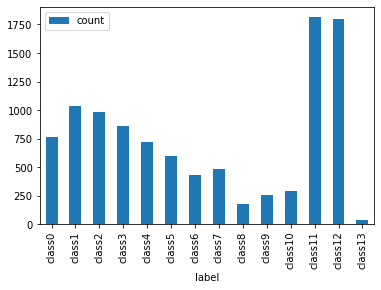

In [89]:
# visualize the labelcount
tag_dict ={}
for i in range(num_classes):
  tag_dict['class'+ i.__str__()] = dataset.iloc[:,103+i].value_counts()[1]
labelcount = pd.DataFrame(list(tag_dict.items()),columns=['label', 'count'])
labelcount.plot(x='label', y='count', kind='bar')
plt.show()

In [0]:
data = np.array(dataset.iloc[:,:103])
functions = np.array(dataset.iloc[:,103:])
data_train, data_test, function_train, function_test = train_test_split(data, functions, random_state=0, train_size = 0.7)

## Task 1: Implement the Binary Relevance Algorithm

In [0]:
class BinaryRelevanceClassifier(BaseEstimator, ClassifierMixin):
    # Constructor for the classifier object
    def __init__(self, add_noise = False):
        self.add_noise = add_noise
        
    # The fit function to train a classifier
    def fit(self, data, functions):    
        # Create a new empty dictionary into which we will store relevance
        self.relevances_ = dict()

        # Iterate all functioins
        for i in range(14):
            status = functions[:,i]
            status = status.T
            self.relevances_[i] = BaggingClassifier(n_estimators=10, random_state=0).fit(data, status)
        
        # Return the classifier
        return self
            
    # The predict function to make a set of predictions for a set of query instances
    def predict(self, X):
        # Check is fit had been called by confirming that the teamplates_ dictiponary has been set up
        check_is_fitted(self, ['relevances_'])

        # Initialise an empty list to store the predictions made
        pos_functions = list()
        
        # Iterate all functioins to predict
        for i in range(14):
            pos_functions.append(self.relevances_[i].predict(X))
            
        return np.array(pos_functions).T


## Task 2: Implement the Binary Relevance Algorithm with Under-Sampling

In [0]:
class BRUnderSample(BaseEstimator, ClassifierMixin):
    # Constructor for the classifier object
    def __init__(self, under_sampling='undersampling', algorithm_model = 'BaggingClassifier'):
        self.under_sampling = under_sampling
        self.algorithm_model = algorithm_model
        
    # The fit function to train a classifier
    def fit(self, data, functions):
         # Create a new empty dictionary into which we will store relevance
        self.relevances_ = dict()
        
        # Add an option to under-sample
        rus = RandomUnderSampler(random_state=0)
        
        # Iterate all functioins
        for i in range(14):
            status = functions[:,i]
            status = status.T

            # Under-sample data and status
            if self.under_sampling == 'undersampling':
                temp_data, status = rus.fit_sample(data,status)
            elif self.under_sampling == 'naturesampling':
                temp_data, status = data, status
            # algorithm choose
            if self.algorithm_model == 'BaggingClassifier':
              self.relevances_[i] = BaggingClassifier(n_estimators=10, random_state=0).fit(temp_data, status)
            elif self.algorithm_model == 'LogisticRegression':
              self.relevances_[i] = BaggingClassifier(base_estimator = linear_model.LogisticRegression(),n_estimators=10).fit(temp_data, status)
            elif self.algorithm_model == 'DecisionTree':
              self.relevances_[i] = BaggingClassifier(base_estimator = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 6, min_samples_leaf = 200),n_estimators=10).fit(temp_data, status)
            elif self.algorithm_model == 'KNN':
              self.relevances_[i] = BaggingClassifier(base_estimator = neighbors.KNeighborsClassifier(n_neighbors =3),max_samples=0.1,max_features=0.5).fit(temp_data,status)

        # Return the classifier
        return self

    # The predict function to make a set of predictions for a set of query instances
    def predict(self, X):
        # Check is fit had been called by confirming that the teamplates_ dictiponary has been set up
        check_is_fitted(self, ['relevances_'])
        
        # Initialise an empty list to store the predictions made
        pos_functions = list()

        # Iterate all functioins to predict
        for  i in range(14):
            pos_functions.append(self.relevances_[i].predict(X))
            
        return np.array(pos_functions).T

## Task 3: Compare the Performance of Different Binary Relevance Approaches

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

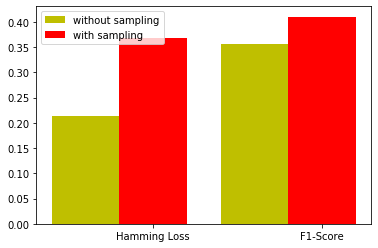

In [98]:
br = BinaryRelevanceClassifier()
br.fit(data_train, function_train)
function_pred = br.predict(data_test)

# The fraction of labels that are incorrectly predicted
brLoss = hamming_loss(function_test, function_pred)
# F1 score: weighted average of the precision and recall
brfScore = f1_score(function_test, function_pred, average='macro')

bru = BRUnderSample()
bru.fit(data_train, function_train)
function_pred = bru.predict(data_test)

# The fraction of labels that are incorrectly predicted
bruLoss = hamming_loss(function_test, function_pred)
# F1 score: weighted average of the precision and recall
brufScore = f1_score(function_test, function_pred, average='macro')

name_list = ['Hamming Loss','F1-Score']
num_list = [brLoss,brfScore]
num_list1 = [bruLoss,brufScore]
x = list(range(len(num_list)))
total,n = 0.8, 2
width = total / n

plt.bar(x, num_list, width = width, label ='without sampling',fc = 'y')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, num_list1, width = width, label ='with sampling',tick_label = name_list,fc = 'r')
plt.legend()
plt.show()

In [136]:
param_grid = [
 {'under_sampling': ['undersampling','naturesampling'],
 'algorithm_model': ['BaggingClassifier','LogisticRegression','DecisionTree','KNN']}
]
my_tuned_model = GridSearchCV(BRUnderSample(), param_grid, cv=cv_folds, verbose = 2)
my_tuned_model.fit(data_train, function_train)
print("Best parameters set found on development set:")
print(my_tuned_model.best_params_)
model_tuned_params_list["Tuned model"] = my_tuned_model.best_params_
print(my_tuned_model.best_score_)

function_pred = my_tuned_model.predict(data_test)

# The fraction of labels that are incorrectly predicted
tunedLoss = hamming_loss(function_test, function_pred)
print(tunedLoss)
# F1 score: weighted average of the precision and recall
tunedfScore = f1_score(function_test, function_pred, average='macro')
print(tunedfScore)

0.20769382133018496
0.338098381256791


## Task 4: Implement the Classifier Chains Algorithm

In [0]:
# Write your code here
class ClassChainsClassifier(BaseEstimator, ClassifierMixin):
    # Constructor for the classifier object
    def __init__(self, add_noise = False):
        self.add_noise = add_noise
        
    # The fit function to train a classifier
    def fit(self, data, functions):    
        # Create a new empty dictionary into which we will store relevance
        self.relevances_ = dict()
        data = data.iloc[:,:103]
        # Iterate all functioins
        for i in range(14):
            status = functions[:,i]
            status_squeeze = np.squeeze(status)
            self.relevances_[i] = BaggingClassifier(n_estimators=10, random_state=0).fit(data,status_squeeze)
            data = np.concatenate((data,np.reshape(status_squeeze,(data.shape[0],1))),axis=1)
            
    # The predict function to make a set of predictions for a set of query instances
    def predict(self, X):
        # Check is fit had been called by confirming that the teamplates_ dictiponary has been set up
        check_is_fitted(self, ['relevances_'])

        # Initialise an empty list to store the predictions made
        pos_functions = list()
        j = 0
        # Iterate all functioins to predict
        for i in range(14):
            j = 103+i
            # if len(X) > 0:
            pos_functions.append(self.relevances_[i].predict(X[:,:j]))
            
        return np.array(pos_functions).T

## Task 5: Evaluate the Performance of the Classifier Chains Algorithm

In [0]:
# Write your code here


## Task 6: Reflect on the Performance of the Different Models Evaluated

*Write your reflection here (max 300 words)*
